In [1]:
# from kalmanutils import validate_geoms_matrix, interpolate_geometries
import farsiteutils_v2 as futils
import uuid
import datetime

import pandas as pd
import geopandas as gpd

import shapely
from shapely.geometry import MultiPolygon, Polygon, Point, GeometryCollection
from shapely.validation import make_valid

from matplotlib import pyplot as plt
import numpy as np

import random 
import pickle

/opt/conda/lib/python3.11/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
def sample_geometry(geom, sigma=1):
    sampled_vertices = []
    
    # Choose a random direction
    theta = random.uniform(0,2*np.pi)

    for (x,y) in geom.exterior.coords[:-1]:
        mu=0
        
        randx = random.gauss(mu, sigma)
        randy = random.gauss(mu, sigma)
        
        sampled_vertices.append((x+randx, y+randy))

    sampled_vertices = np.array(sampled_vertices)
    return Polygon(sampled_vertices)


def plot_geometry(geom, ax = None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=(4,4))
    
    if isinstance(geom, MultiPolygon):
        for g in geom.geoms:
            x,y = g.exterior.coords.xy
            ax.plot(x[:-1],y[:-1], **kwargs)
    else:
        x,y = geom.exterior.coords.xy
        ax.plot(x[:-1],y[:-1], **kwargs)
        
    ax.set_aspect('equal')

In [3]:
SELECTED_FIRE_DEFAULT = 'Maria2019'
DATA_PATH = '/home/jovyan/data/'    # Folder to keep all the data while running the simulations

# Create handles for simulation
fp = futils.FilePaths(DATA_PATH)
usr = futils.User(fp)

Database interaction not yet implemented. Use pickle file for dataframes instead!


In [4]:
geom = gpd.read_file(usr.db.dfObservation.iloc[0]['filepath'])['geometry'][0]
cx, cy = geom.centroid.xy
cx = cx[0]
cy = cy[0]

In [5]:
xlim, ylim = ((-2086159.5737761224, -2081725.6989369977), (1502203.4846704765, 1505515.9706975585))
width = 4433.874839124735
height = 3312.4860270819627

dx = xlim[1]-xlim[0]
dy = ylim[1]-ylim[0]

def set_axis_lims(ax):
    ax.set_xlim((cx-width/2), (cx+width/2))
    ax.set_ylim((cy-height/2), (cy+height/2))

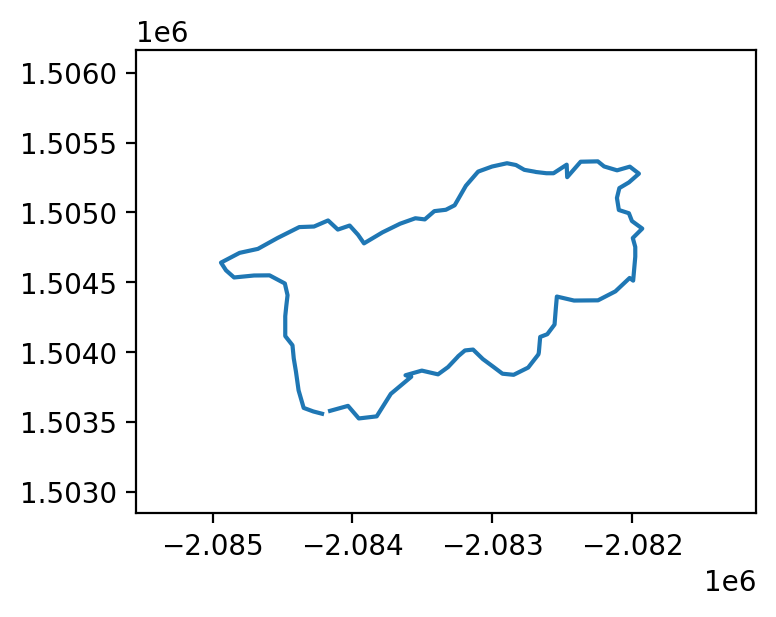

In [6]:
fig, ax= plt.subplots(1,1, figsize=(4,4), dpi=200)
plot_geometry(geom, ax=ax)
set_axis_lims(ax)

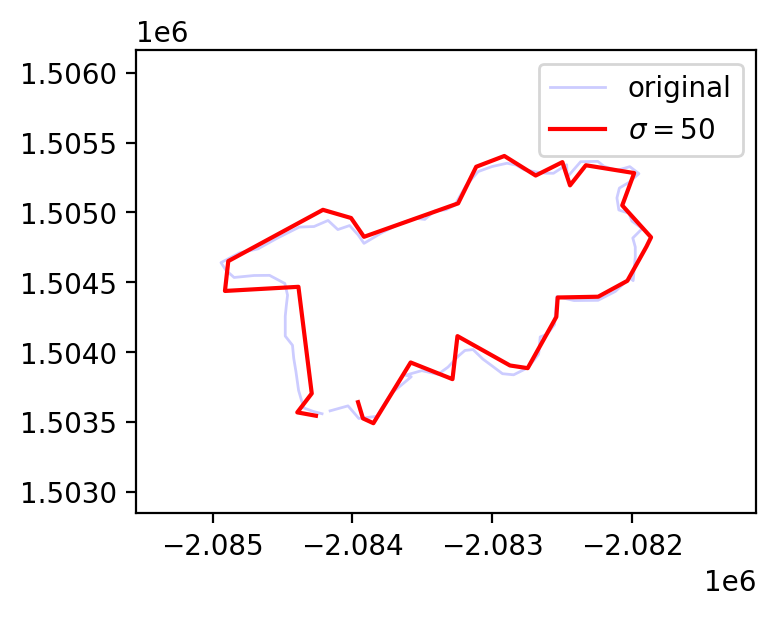

In [36]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
sigma=50
geom2 = geom.simplify(sigma)
geom1 = sample_geometry(geom2,sigma)
plot_geometry(geom, ax=ax, color=(0,0,1,0.2), lw=1, label='original')
plot_geometry(geom1, color=(1,0,0,1),lw=1.5, ax=ax, label=r'$\sigma=$'+f'{sigma}')
ax.legend(loc='upper right')
set_axis_lims(ax)

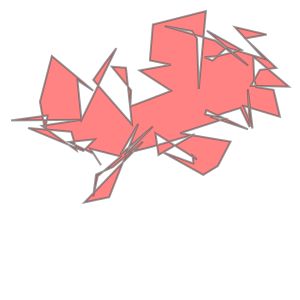

In [25]:
geom1

In [ ]:
Polygon ((55 10, 141 237, 249 23, 21 171, 252 169, 24 89, 266 73, 55 10))

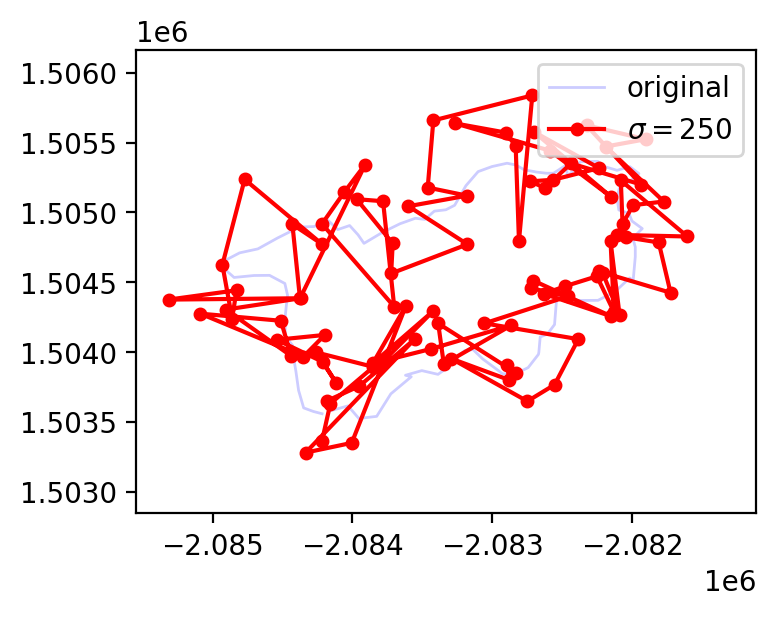

In [26]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
# sigma=50
plot_geometry(geom, ax=ax, color=(0,0,1,0.2), lw=1, label='original')
plot_geometry(geom1, color=(1,0,0,1), marker='o', markersize=4, lw=1.5, ax=ax, label=r'$\sigma=$'+f'{sigma}')
ax.legend(loc='upper right')
set_axis_lims(ax)

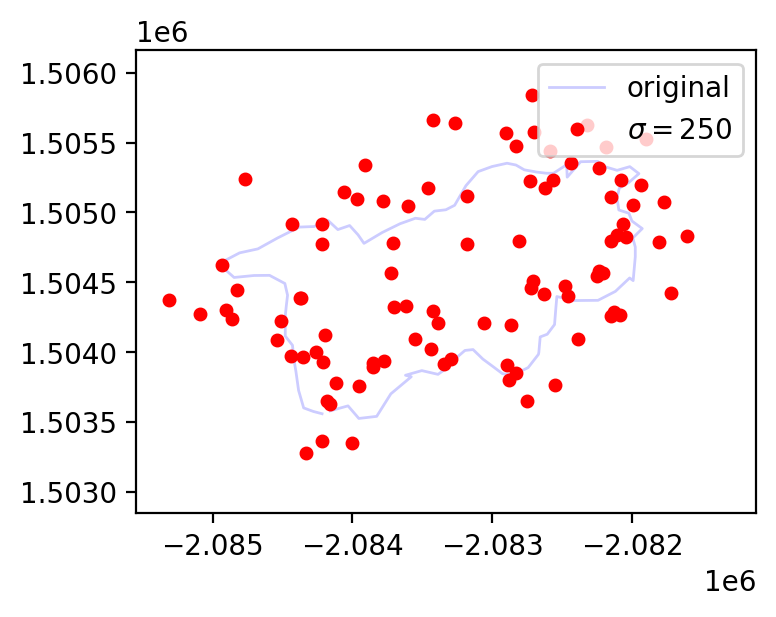

In [27]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
# sigma=50
plot_geometry(geom, ax=ax, color=(0,0,1,0.2), lw=1, label='original')
plot_geometry(geom1, color=(1,0,0,1), marker='o', markersize=4, lw=0, ax=ax, label=r'$\sigma=$'+f'{sigma}')
ax.legend(loc='upper right')
set_axis_lims(ax)

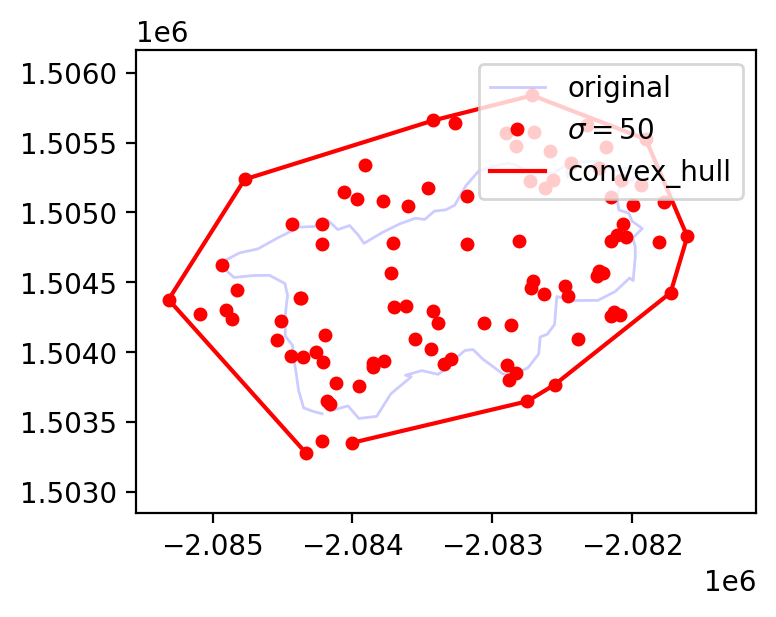

In [28]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
sigma=50
plot_geometry(geom, ax=ax, color=(0,0,1,0.2), lw=1, label='original')
plot_geometry(geom1, color=(1,0,0,1), marker='o', markersize=4, lw=0, ax=ax, label=r'$\sigma=$'+f'{sigma}')
plot_geometry(shapely.convex_hull(geom1), color=(1,0,0,1), lw=1.5, ax=ax, label='convex_hull')
ax.legend(loc='upper right')
set_axis_lims(ax)

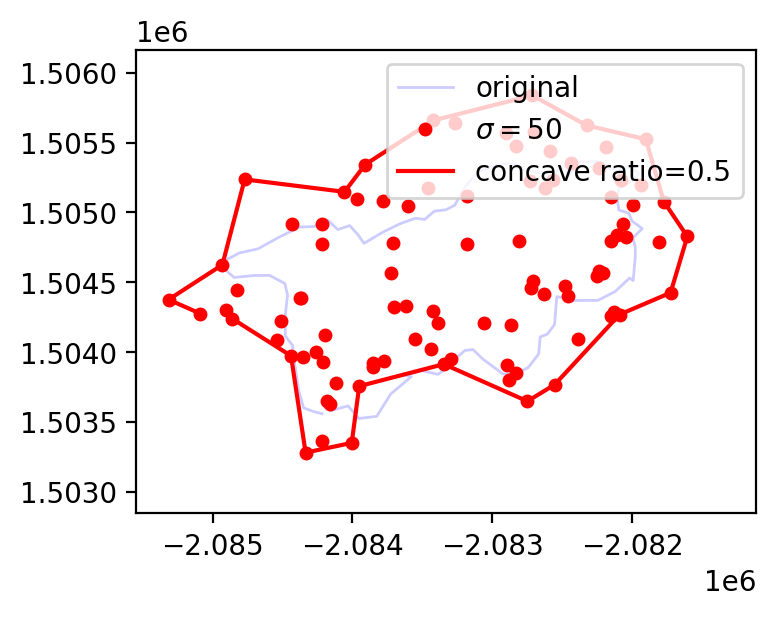

In [29]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
sigma=50
ratio=0.5
plot_geometry(geom, ax=ax, color=(0,0,1,0.2), lw=1, label='original')
plot_geometry(geom1, color=(1,0,0,1), marker='o', markersize=4, lw=0, ax=ax, label=r'$\sigma=$'+f'{sigma}')
plot_geometry(shapely.concave_hull(geom1, ratio=ratio), color=(1,0,0,1), lw=1.5, ax=ax, label='concave ratio='+f'{1-ratio}')
ax.legend(loc='upper right')
set_axis_lims(ax)

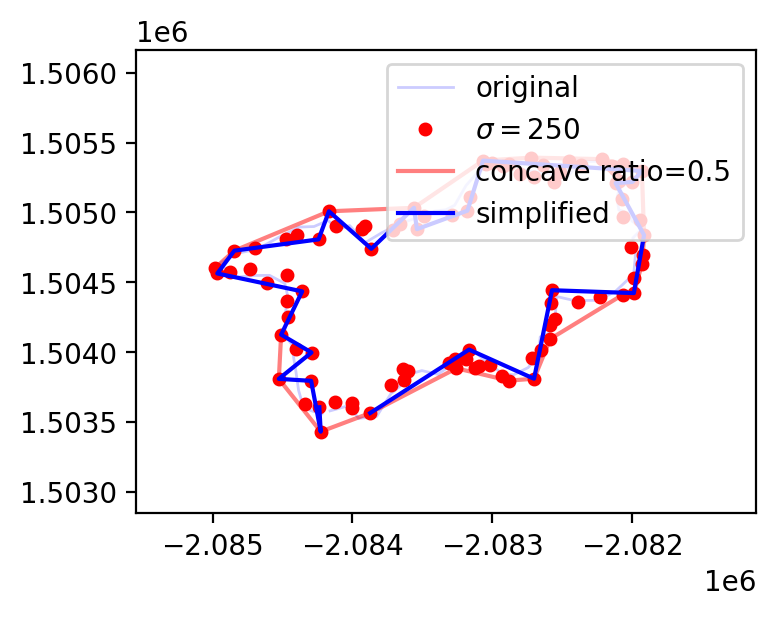

In [101]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
sigma=250
ratio=0.5
plot_geometry(geom, ax=ax, color=(0,0,1,0.2), lw=1, label='original')
plot_geometry(geom1, color=(1,0,0,1), marker='o', markersize=4, lw=0, ax=ax, label=r'$\sigma=$'+f'{sigma}')
plot_geometry(shapely.concave_hull(geom1, ratio=ratio), color=(1,0,0,0.5), lw=1.5, ax=ax, label='concave ratio='+f'{1-ratio}')


plot_geometry(geom2, color=(0,0,1,1), lw=1.5, ax=ax, label='simplified')
ax.legend(loc='upper right')
set_axis_lims(ax)

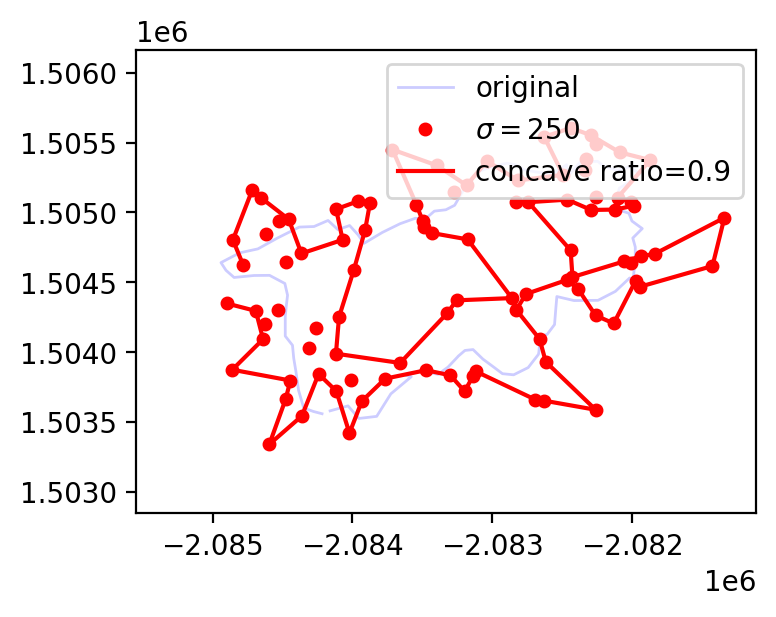

In [88]:
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=200)
sigma=250
ratio=0.1
plot_geometry(geom, ax=ax, color=(0,0,1,0.2), lw=1, label='original')
plot_geometry(geom1, color=(1,0,0,1), marker='o', markersize=4, lw=0, ax=ax, label=r'$\sigma=$'+f'{sigma}')
plot_geometry(shapely.concave_hull(geom1, ratio=ratio), color=(1,0,0,1), lw=1.5, ax=ax, label='concave ratio='+f'{1-ratio}')
ax.legend(loc='upper right')
set_axis_lims(ax)